### **Célula para inicializar as importações e funções de módulo**

In [1]:
#Importações
import sys
import os
import pandas as pd
import numpy as np
%matplotlib inline

#Adicionando o caminho do módulo de classificacao
sys.path.append(os.path.abspath(".."))

#importação das funções do módulo
from classificacao import loading_date, choose_k, random_validator, view_scatter_plot


### **Célula para carregar os dados do CSV e visualiza-los**

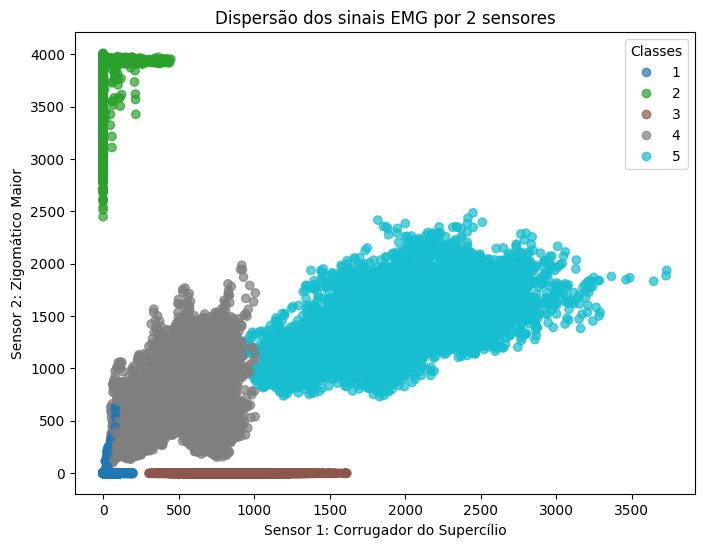

In [2]:
# Carregar dados do CSV
X, y = loading_date("data/EMGDataset.csv")

#Visualizar os dados do CSV
view_scatter_plot(X, y)

### **Célula para escolher melhor K com K-Fold**

In [3]:
# Definir valores de k a testar
k_values = [1, 7, 11, 17, 23, 39, 101, 501, 1001]

# Escolher melhor k por meio do K-Fold
better_k, results = choose_k(X, y, k_values)

# Exibir resultados 
results_df =pd.DataFrame.from_dict(results, orient='index', columns=["Acurácia média"]).sort_index()
display(results_df)
print(f"\nMelhor k encontrado: {better_k}")

,Acurácia média
1,0.99920
7,0.99896
11,0.99886
17,0.99866
23,0.99840
39,0.99824
101,0.99816
501,0.99782
1001,0.99622



Melhor k encontrado: 1


### **Célula para validação aleatória e mostrar suas estatísticas**

In [4]:
# Rodar validação aleatória
statistics, better_conf, worse_conf = random_validator(X, y, better_k, rounds=500)

# Estatísticas
print("\nEstatísticas validação aleatória de 500 rodadas:")
pd.DataFrame(statistics, index=["Estatísticas"]).T


Estatísticas validação aleatória de 500 rodadas:


,Estatísticas
Média,0.999174
Desvio-padrão,0.000269
Maior valor,0.999800
Menor valor,0.998200


### **Célula para exibição das matrizes de confusão**

In [16]:
acc_best, conf_best = better_conf
acc_worst, conf_worst = worse_conf

print("\nMelhor caso de matriz de confusão (acurácia {:.4f}):".format(acc_best))
display(pd.DataFrame(conf_best))

print("\nPior caso de matriz de confusão (acurácia {:.4f}):".format(acc_worst))
display(pd.DataFrame(conf_worst))


Melhor caso de matriz de confusão (acurácia 0.9998):


,0,1,2,3,4
0,2033,0,0,0,0
1,0,2019,0,0,0
2,0,0,2010,0,0
3,1,0,0,1990,1
4,0,0,0,0,1946



Pior caso de matriz de confusão (acurácia 0.9982):


,0,1,2,3,4
0,2025,0,0,7,0
1,0,2037,0,0,0
2,0,0,1952,0,0
3,8,0,0,1994,2
4,0,0,0,1,1974
